In [35]:
import pandas as pd
import numpy as np
# from numpy import functools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# read the data and convert it to a pada data frame which is easy to work with
# a data frame is an object with column as the keys and list of values as the data
df = pd.read_csv('England League1 19 oct 2018.csv')
# head() gives the values first five rows of your data frame from index 0 to 4
df.head()
# info() gives the the range number of instances(rows) and the indexes, attributes(columns), number of rows in them and their data types and 
df.info()
#  describe() gives the statistical representation of each column that have int or float (mean, max, min, std etc...)
df.describe()
# columns give the column names in a list and the datatype of the data frame
df.columns
# df[col]
df['FTR'].dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 9 columns):
Date        3464 non-null object
HomeTeam    3464 non-null object
AwayTeam    3464 non-null object
FTHG        3464 non-null int64
FTAG        3464 non-null int64
FTR         3464 non-null object
B365H       3464 non-null float64
B365D       3464 non-null float64
B365A       3464 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 243.6+ KB


dtype('O')

In [36]:
# detemine the number of rows and colunms in a data frame
df.shape
# detemine if there are null values in the data frame
df.isnull().sum().sum()
# detemine the lenth of the dataframe
len(df)
# Round all values to 2 decimal places
# df.apply(functools.partial(np.round, decimals=2))
# for col in df.columns:
# #     print(df[col])
#     for name, values in df[col].iteritems():
# #         print("%r, %r" % (name, values))
#         if(values.dtype == np.float64 or values.dtype == np.int64):
#             print("float or int type %r" % (values.dtype))
#             # treat_numeric(df[name])
#         elif(df[name].dtype == np.str):
#             print("string type %r" % (df[name].dtype))
#             #treat_str(df[y])
#         elif(df[name].dtype == np.object):
#             print("object type %r" % (df[name].dtype))
#             #treat_object(df[name])
#         else:
#             print("other type %r" % (values.dtype))

3464

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
df['FTR'] = labelencoder.fit_transform(df['FTR'])

# onehotencoder = OneHotEncoder(categorical_features = [5])
# df = onehotencoder.fit_transform(df).toarray()
df.head()
# df.corr()
# sns.heatmap(df.corr())


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A
0,4/8/2018,Accrington,Gillingham,0,2,0,2.30,3.5,3.25
1,4/8/2018,Barnsley,Oxford,4,0,2,2.00,3.6,4.00
2,4/8/2018,Burton,Rochdale,1,2,0,2.20,3.4,3.60
3,4/8/2018,Coventry,Scunthorpe,1,2,0,2.30,3.4,3.40
4,4/8/2018,Fleetwood Town,AFC Wimbledon,0,1,0,2.25,3.3,3.60


1.026588537578677


,Actual,Predicted
2494,2,1.167379
2795,2,1.415911
400,0,0.788111
1564,2,1.253539
843,0,1.167232
1955,0,1.415911
3345,0,1.033379
1357,2,1.035332
112,1,1.188799
3219,2,1.482603


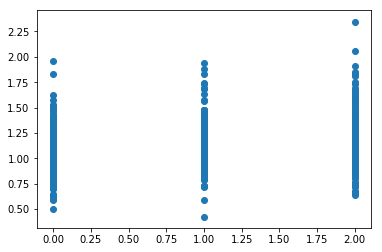

In [40]:
X = df[['B365H', 'B365D', 'B365A']]
y = df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
# print(lm.coef_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1.head(25)

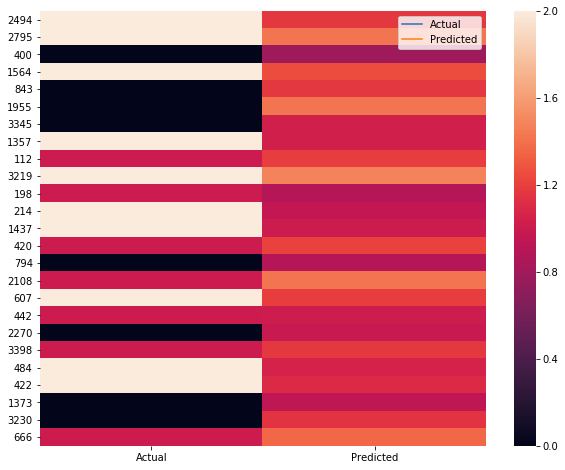

In [46]:
# df1.plot(figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# sns.heatmap(df1.head(25))

In [47]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A
0,4/8/2018,Accrington,Gillingham,0,2,0,2.30,3.5,3.25
1,4/8/2018,Barnsley,Oxford,4,0,2,2.00,3.6,4.00
2,4/8/2018,Burton,Rochdale,1,2,0,2.20,3.4,3.60
3,4/8/2018,Coventry,Scunthorpe,1,2,0,2.30,3.4,3.40
4,4/8/2018,Fleetwood Town,AFC Wimbledon,0,1,0,2.25,3.3,3.60
